NAMA : ADI HERIANTO RAJAGUKGUK

RAKAMIN ACADEMY BATCH 22

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')


### LOAD DATASET

1. Dari GDRIVE

In [156]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [157]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/MINI PROJECT 2/hotel_bookings_data.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


# Exploratory Data Analysis

## 1. Descriptive Statistics

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [159]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


KOLOM YANG MEMILIKI DATA DUPLIKAT

In [160]:
print('Data yang duplikat = ', df.duplicated().sum())

Data yang duplikat =  33261


KOLOM YANG MEMILIKI MISSING VALUE

In [161]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [162]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [163]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [164]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,No Deposit,NaN,NaN,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,No Deposit,303.0,NaN,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,No Deposit,240.0,NaN,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,No Deposit,15.0,NaN,0,Personal,105.5,0,0,Canceled


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### <b> Grouping by Data Variable Type (Pick + Separate Columns)

In [166]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['lead_time','arrival_date_year', 'adults', 'children', 'babies','previous_cancellations', 'previous_bookings_not_canceled','booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'total_of_special_requests']
cats = ['hotel', 'arrival_date_month','meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type','reservation_status']

#### A. DATA NUMERICAL

In [167]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
agent,103050.0,86.693382,110.774548,1.00,9.00,14.000,229.0,535.0
company,6797.0,189.266735,131.655015,6.00,62.00,179.000,270.0,543.0


#### B. DATA CATEGORICAL

In [168]:
df[cats].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [169]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count column meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Value count column city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count column

- value 'undefine' pada kolom `meal` sebaiknya diganti menjadi 'no meal' (asumsi saja)
- value 'No-show' pada kolom `reservation_status` diganti menjadi 'Check-Out' (nilai yang paling sering muncul)
- value 'Undefined' pada kolom `distribution_channel` diganti menjadi 'TA/TO' (menyesuaikan dengan modus)
- value 'Undefined' pada kolom `market_segment` diganti menjadi 'Online TA' (menyesuaikan dengan modus)

In [170]:
df['meal']

0         Breakfast
1         Breakfast
2         Breakfast
3         Breakfast
4         Breakfast
            ...    
119385    Breakfast
119386    Breakfast
119387    Breakfast
119388    Breakfast
119389       Dinner
Name: meal, Length: 119390, dtype: object

## 2. Univariative Analysis

In [171]:
df_1 = df.copy()

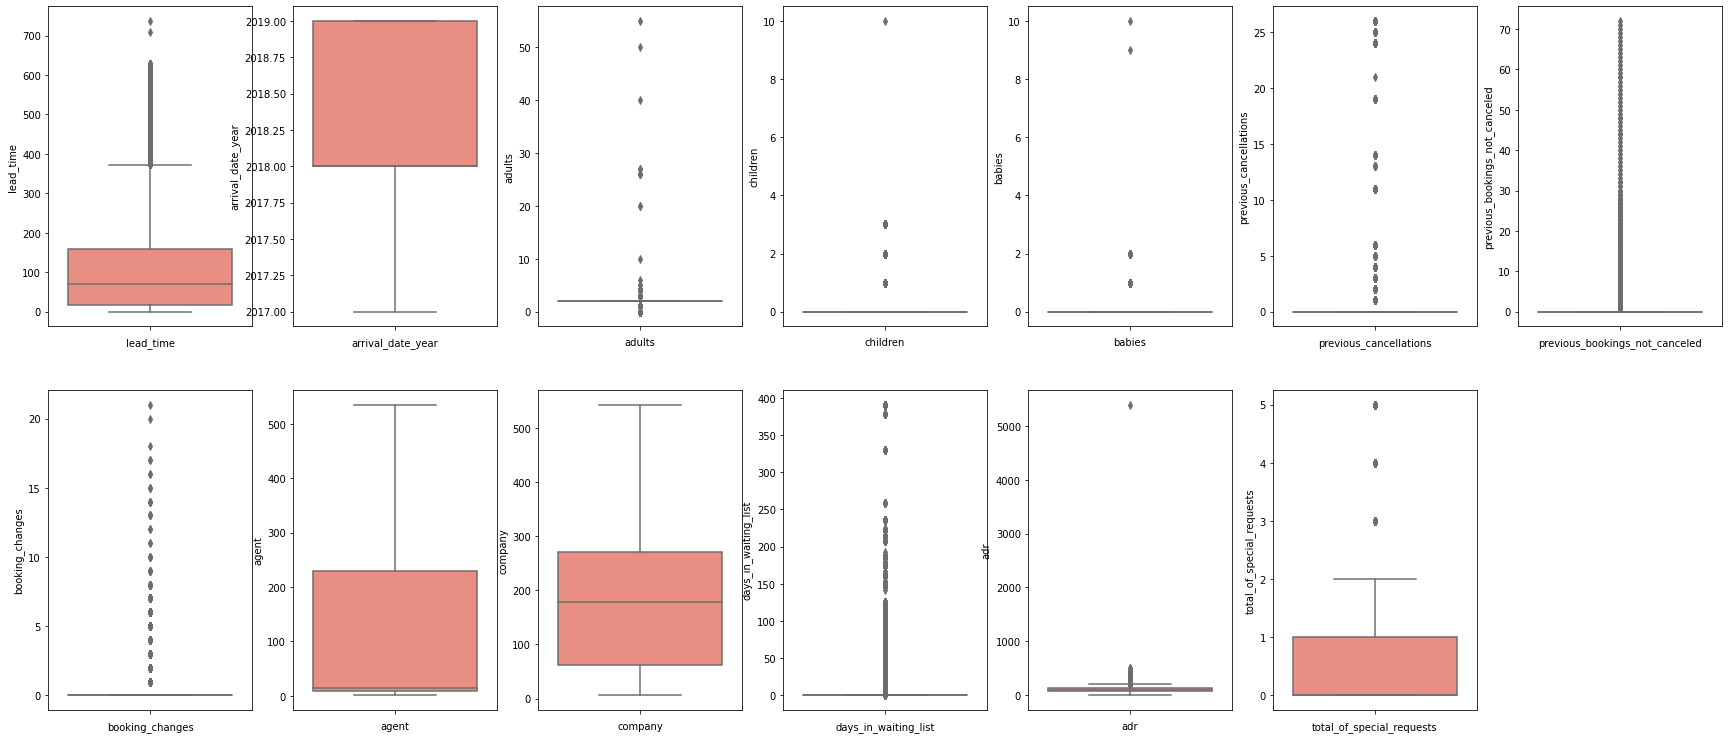

In [172]:
plt.figure(figsize=(30,20))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df_1[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.

- Outlier terlihat utamanya pada kolom `adukts` dan `adr`
- Outlier lainnya yang cukup berpengaruh untuk pemodelan nantinya adalah `children`, `babies`, `days_in_waiting_list` dan `total of special_request`
- Outlier pada kolom lainnya masih dapat ditoleransi karena range value terhadap outlier tidak terlalu jauh. 

<b> Metode untuk menghapus outlier ini dapat menggunakan Z-Score. 

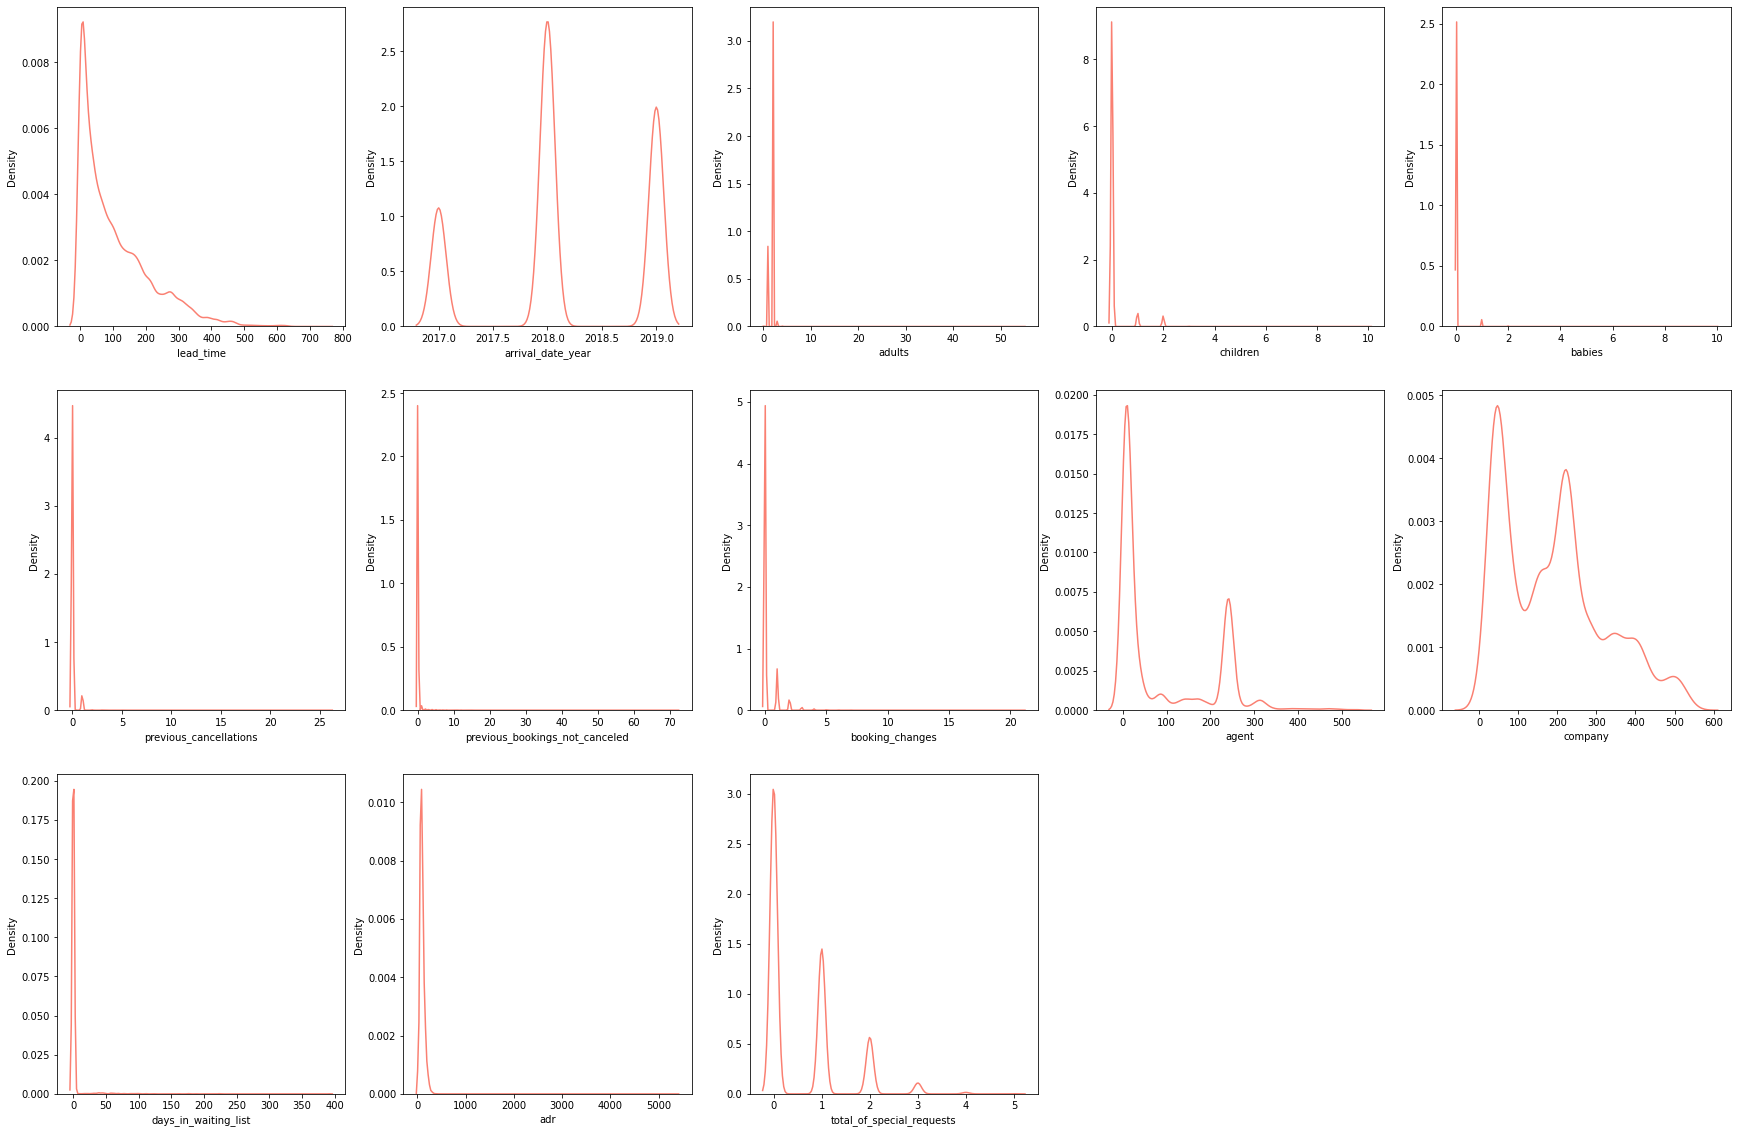

In [173]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df_1[features[i]], color='salmon')
    plt.xlabel(features[i])

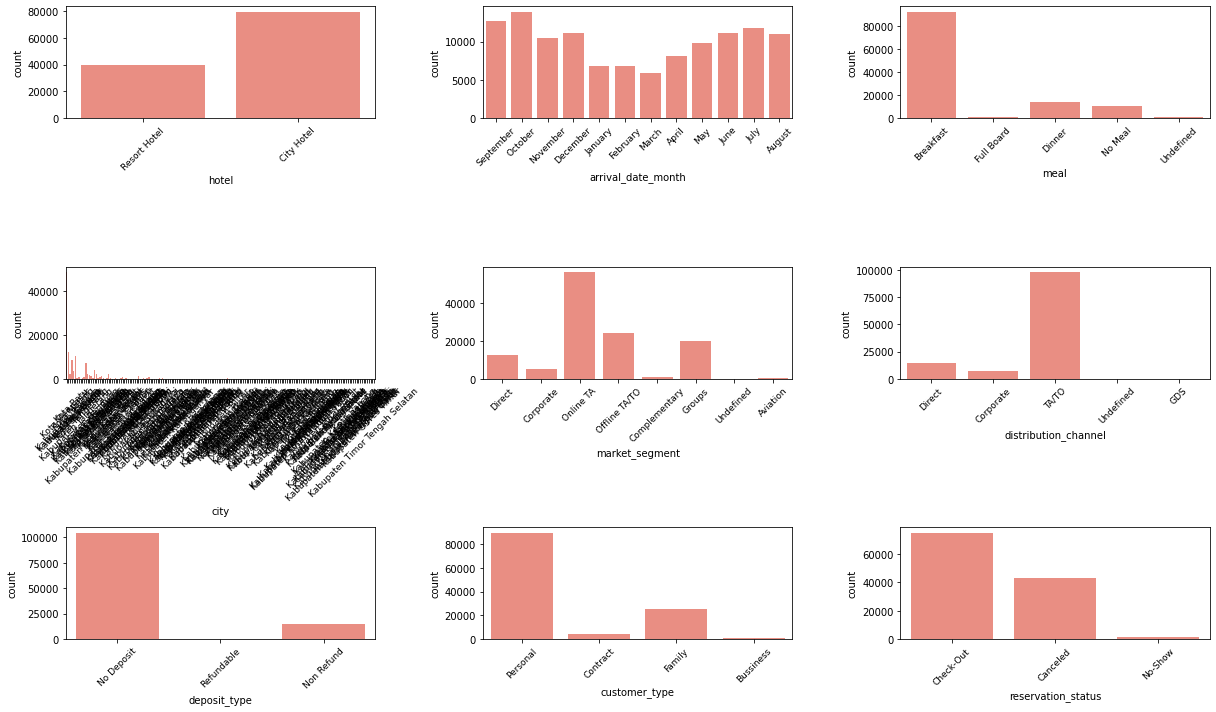

In [174]:
plt.figure(figsize=(17,10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df_1[cats[i]], color='salmon', orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

## 3. Multivariate Analysis

In [175]:
df_1.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_weekdays_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


Text(0.5, 1.0, 'Korelasi')

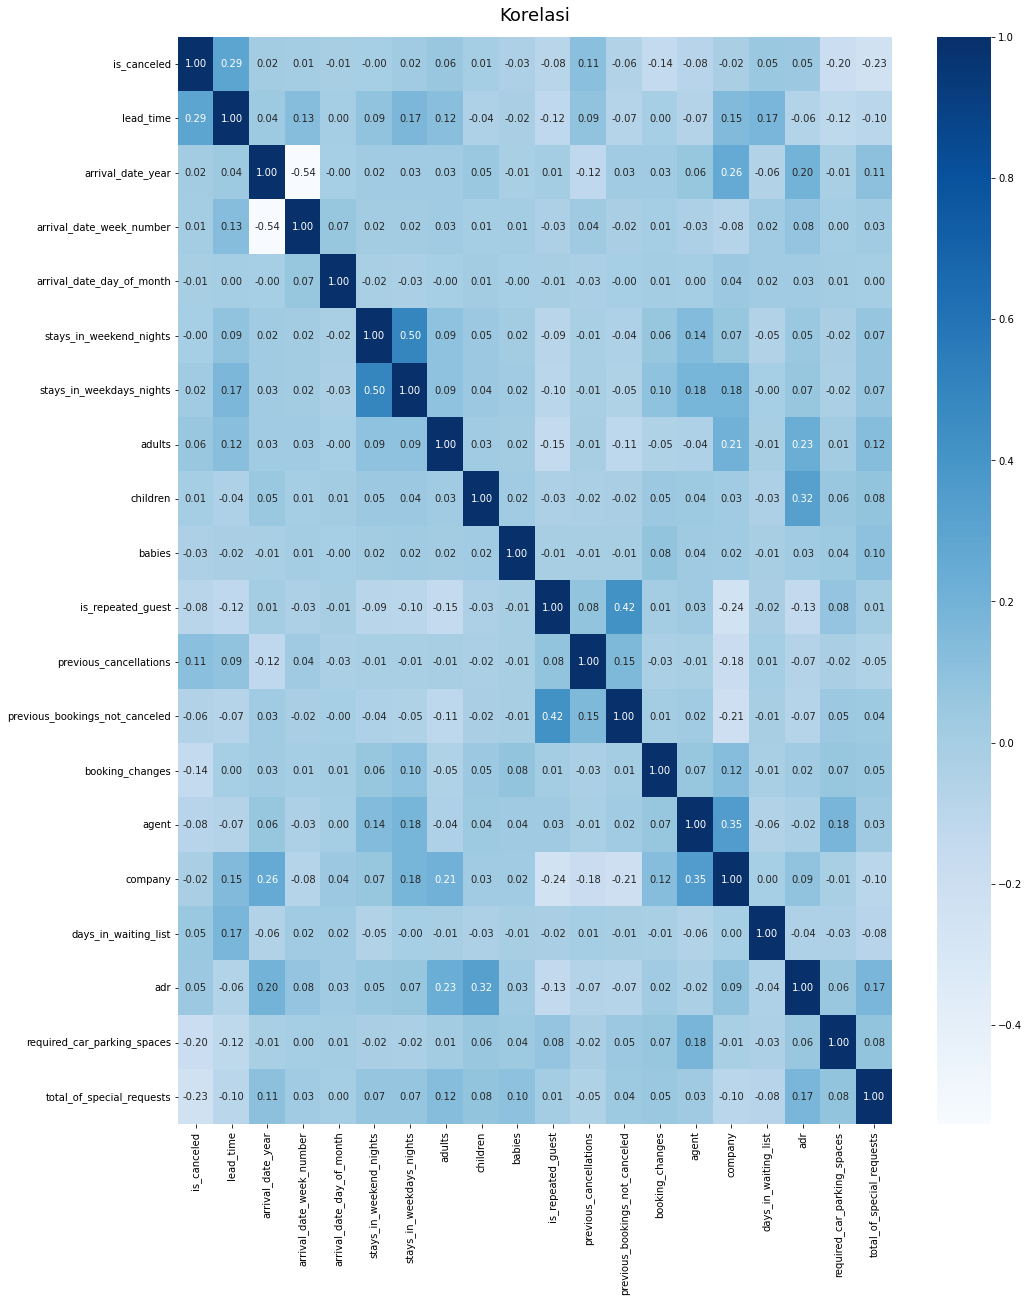

In [176]:
plt.figure(figsize = (16,20))
heatmaps=sns.heatmap(df_1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

# 2. DATA PRE PROCESSING

## 1. DATA CLEANSING

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### A. HANDLING MISSING VALUE

Kita cek terlebih dahulu jumlah missing value pada dataset kita, dalam jumlah dan dalam persen

In [178]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [179]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

- Untuk kolom/feature yang memiliki missing value dengan tipe data numerik (`Company`, `Agent`, dam `Children` ) karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. jika mean< median, digunakan nilai mean.
- untuk Kolom `City`, nilai null didrop

In [180]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


#### PROSES IMPUTASI

In [181]:
# company, agent, children dengan median
df['company'].fillna(df['company'].median(), inplace=True)
df['agent'].fillna(df['agent'].median(), inplace=True)
df['children'].fillna(df['children'].median(), inplace=True)

In [182]:
df['city'].fillna(('Kota Denpasar'), inplace=True)

In [183]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

hotel                             0.0
distribution_channel              0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
company                           0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
is_repeated_guest                 0.0
market_segment                    0.0
is_canceled                       0.0
city                              0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_weekdays_nights          0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date_week_number          0.0
arrival_date_month                0.0
arrival_date

In [184]:
df[cats].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,119390,177,Kota Denpasar,49078
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


## B. Duplicated Data (SKIP)

In [191]:
print('Data yang duplikat = ', df.duplicated().sum())

Data yang duplikat =  33282


In [192]:
df_non_duplicate = df.drop_duplicates(keep = 'first')
df_non_duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,14.0,179.0,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,14.0,179.0,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,14.0,179.0,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,179.0,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,179.0,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,179.0,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,179.0,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,179.0,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,179.0,0,Personal,104.40,0,0,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86108 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86108 non-null  object 
 1   is_canceled                     86108 non-null  int64  
 2   lead_time                       86108 non-null  int64  
 3   arrival_date_year               86108 non-null  int64  
 4   arrival_date_month              86108 non-null  object 
 5   arrival_date_week_number        86108 non-null  int64  
 6   arrival_date_day_of_month       86108 non-null  int64  
 7   stays_in_weekend_nights         86108 non-null  int64  
 8   stays_in_weekdays_nights        86108 non-null  int64  
 9   adults                          86108 non-null  int64  
 10  children                        86108 non-null  float64
 11  babies                          86108 non-null  int64  
 12  meal                           

## C. Outlier Handling (SKIP)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,14.0,179.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,14.0,179.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,14.0,179.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,179.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,179.0,0,Personal,98.0,0,1,Check-Out


In [196]:
df_a = df_non_duplicate.copy()

In [197]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_a)}')

filtered_entries = np.array([True] * len(df_a))

for col in df[nums]:
    zscore = abs(stats.zscore(df_a[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 5) & filtered_entries # keep yang kurang dari 5 absolute z-scorenya
    
df_z = df_a[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 5

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')
print('Maka outlier yang dihapus sekitar', round((len(df_a)-len(df_z))/len(df_a)*100), '%')

Jumlah baris sebelum memfilter outlier: 86108
Jumlah baris setelah memfilter outlier: 82602
Maka outlier yang dihapus sekitar 4 %


## MENGGANTI BEBERAPA VALUE PADA BEBERAPA KOLOM TERTENTU YANG TIDAK SESUAI

In [200]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count column meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Value count column city:
Kota Denpasar              49078
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count column

- value 'undefine' pada kolom `meal` sebaiknya diganti menjadi 'no meal' (asumsi saja)
- value 'No-show' pada kolom `reservation_status` diganti menjadi 'Check-Out' (nilai yang paling sering muncul)
- value 'Undefined' pada kolom `distribution_channel` diganti menjadi 'TA/TO' (menyesuaikan dengan modus)
- value 'Undefined' pada kolom `market_segment` diganti menjadi 'Online TA' (menyesuaikan dengan modus)

In [201]:
df['meal'].replace('Undefined', 'No Meal', inplace = True)
df['reservation_status'].replace('No-Show', 'Check-Out', inplace = True)
df['distribution_channel'].replace('Undefined', 'TA/TO', inplace = True)
df['market_segment'].replace('Undefined', 'Online TA', inplace = True)

MARI KITA CEK KEMBALI

In [202]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count column meal:
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

Value count column city:
Kota Denpasar              49078
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count column market_segment:
Onl

# TASK 2 - MONTHLY BOOKING ANALYSIS

Dalam analisis dan visualisasi ini, kita menggunakan data yang sudah di cleaning saja, dan variabel yang digunakan merupakan variabel yang belum dihilangkan outliernya ataupun juga belum dihilangkan duplikatnya. maka, digunakan df_1 = df.copy()

In [203]:
df_1 = df.copy()

### <b> Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)

In [204]:
df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,14.0,179.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,14.0,179.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,14.0,179.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,179.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,179.0,0,Personal,98.0,0,1,Check-Out


In [205]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [206]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


- Jumlah pengunjung adalah adults+children+babies

In [207]:
df_1['guest(s)'] = df['adults'] + df['children'] + df['babies']
df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest(s)
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,14.0,179.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,179.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,179.0,0,Personal,98.0,0,1,Check-Out,2.0


In [212]:
df_total_booking = df_1.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year': ['nunique'],
                                                                      'guest(s)':['count']}).reset_index()
df_total_booking.columns = ['hotel type', 'arrival_month', 'arrival_year', 'total_booking']
df_total_booking.sort_values('arrival_year').reset_index(drop=True)

,hotel type,arrival_month,arrival_year,total_booking
0,City Hotel,April,2,4965
1,Resort Hotel,July,2,3559
2,Resort Hotel,January,2,2437
3,Resort Hotel,February,2,2648
4,Resort Hotel,December,2,3555
5,Resort Hotel,August,2,3045
6,Resort Hotel,April,2,3103
7,Resort Hotel,May,2,3336
8,Resort Hotel,November,2,3108
9,City Hotel,November,2,7400


In [213]:
df_total_booking['total_booking'].sum()

119390

### Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)

Jika dihitung kembali berdasarkan bulan, dapat lihat bahwa pada data oktokber dan september diambil dari 3 tahun ke belakang sedangkan bulan yang lainnya diambil dari 2 tahun ke belakang maka dilakukan normalisasi dengan mencari <b> rata-rata jumlah booking per bulannnya

In [214]:
df_total_booking['rata-rata_booking'] = round(df_total_booking['total_booking']/df_total_booking['arrival_year'])
df_total_booking

,hotel type,arrival_month,arrival_year,total_booking,rata-rata_booking
0,City Hotel,April,2,4965,2482.0
1,City Hotel,August,2,7894,3947.0
2,City Hotel,December,2,7605,3802.0
3,City Hotel,February,2,4132,2066.0
4,City Hotel,January,2,4357,2178.0
5,City Hotel,July,2,8232,4116.0
6,City Hotel,June,2,7480,3740.0
7,City Hotel,March,2,3736,1868.0
8,City Hotel,May,2,6458,3229.0
9,City Hotel,November,2,7400,3700.0


### Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)

In [216]:
list_bulan = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_total_booking['arrival_month'] = pd.Categorical(df_total_booking['arrival_month'], categories=list_bulan, ordered=True)
df_total_booking = df_total_booking.sort_values(by=['hotel type', 'arrival_month'])
df_total_booking

,hotel type,arrival_month,arrival_year,total_booking,rata-rata_booking
4,City Hotel,January,2,4357,2178.0
3,City Hotel,February,2,4132,2066.0
7,City Hotel,March,2,3736,1868.0
0,City Hotel,April,2,4965,2482.0
8,City Hotel,May,2,6458,3229.0
6,City Hotel,June,2,7480,3740.0
5,City Hotel,July,2,8232,4116.0
1,City Hotel,August,2,7894,3947.0
11,City Hotel,September,3,8088,2696.0
10,City Hotel,October,3,8983,2994.0


### Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

Text(-0.5, 4900, 'The number of city hotel bookings dropped dramatically from August to October')

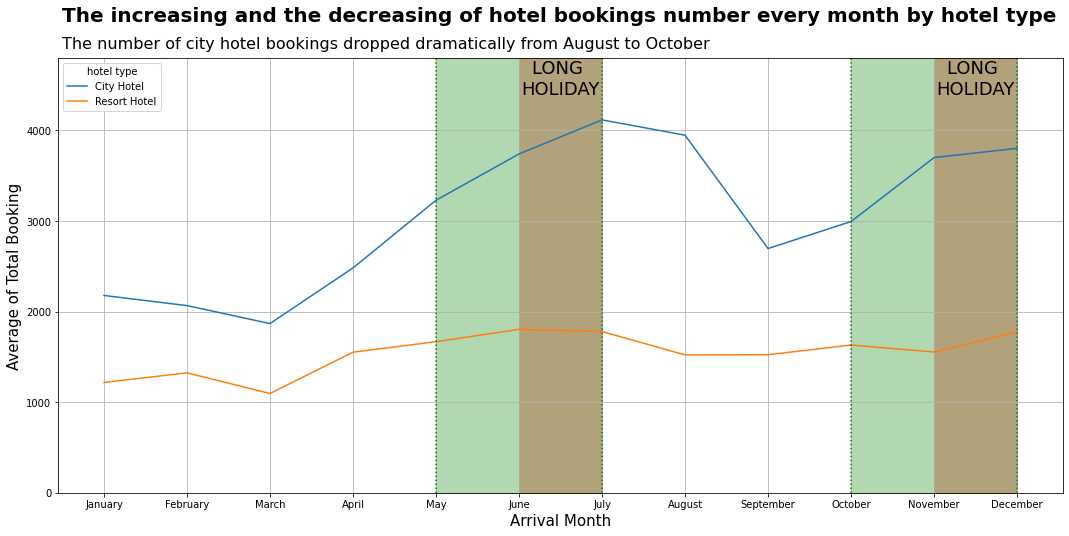

In [241]:
plt.figure(figsize=(18,8))
sns.lineplot(x='arrival_month', y='rata-rata_booking', hue='hotel type', data=df_total_booking)
plt.grid()
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average of Total Booking', fontsize=15) 
plt.ylim(0, 4800)

plt.axvline(4, ls=':', color='green') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls=':', color='green') # membuat garis vertikal untuk menghighlight insight
plt.text(x=5.5, y=4400, s='LONG \nHOLIDAY', horizontalalignment='center', fontsize=18) # menambahkan teks keterangan
plt.stackplot(np.arange(5,7,1), [[4800]], color='red', alpha=0.3) # memberikan blok warna pada area yang dihighlight 
plt.stackplot(np.arange(4,7,1), [[4800]], color='green', alpha=0.3) # memberikan blok warna pada area yang dihighlight 

plt.axvline(9, ls=':', color='green') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls=':', color='green') # membuat garis vertikal untuk menghighlight insight
plt.text(x=10.5, y=4400, s='LONG \nHOLIDAY', horizontalalignment='center', fontsize=18) # menambahkan teks keterangan
plt.stackplot(np.arange(10,12,1), [[4800]], color='red', alpha=0.3) # memberikan blok warna pada area yang dihighlight
plt.stackplot(np.arange(9,12,1), [[4800]], color='green', alpha=0.3) # memberikan blok warna pada area yang dihighlight

plt.text(x=-0.5, y=5200, s="The increasing and the decreasing of hotel bookings number every month by hotel type", fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=4900, s="The number of city hotel bookings dropped dramatically from August to October", fontsize=16)

<b> Insight/Analisis:

Analisis ini bertujuan untuk melihat trend dari jumlah booking hotel per bulannya.
- Januari - Maret adalah jumlah booking paling sedikit, pada bulan ini bisa saja merupakan bulan yang sibuk dengan pekerjaan, ataupun tugas dinas luar kota masih sangat minim. customer yang melakukan booking hanya untuk kepentingan tertentu saja. sedangkan bulan April, jumlah booking hotel tipe city dan Resort sudah mulai meningkat. Customer mulai aware kalau harga hotel akan naik pada masa long holiday, oleh karena itu, customer sudah mulai curi start untuk booking hotel sebelum bulan juni-juli. 
- Bulan May - July, khususnya pada hotel tipe resort merupakan puncak dengan jumlah booking yang naik drastis. karena bulan Juni-Juli adalah long HOLIDAY, atau liburan panjang (baru selesai semesteran, libur semester). Customer melakukan booking hotel dengan tujuan rekreasi ataupun pariwisata (healing mungkin hehehe). Sedangkan hotel tipe city mengalami kenaikan, walaupun tidak begitu drastis. kemungkinan esensi atau manfaat dari hotel tipe city ini adalah untuk karyawan atau pekerja yang memiliki tugas dinas ke luar kota. Oleh karena itu, baik kenaikan, maupun penurunannya, tdak terlalu signifikan. 
- Bulan Agustus - Oktober, terjadi penurunan jumlah booking yang tajam, karena customer sudah selesai melakukan liburan yang panjang. 
sedangkan pada tipe hotel city, penurunan jumlah booking tidak terlalu signifikan, karena memang tipe city hotel ini diperuntukkan untuk karyawan yang dinas luar kota, ataupun kepentingan yang menyangkut pekerjaan, adapun tujuan rekreasi, tampaknya tidak menjadi target utama pada hotel tipe city ini. 
- Bulan Oktober - Desember, jumlah booking hotel tipe resort naik kembali karena akan ada liburan panjang kembali di bulan desember. 
sedangkan tipe city, tidak begitu signifikan karna tidak terlalu bepengaruh terhadap hari libur maupun work month. 